In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [2]:
start="2015-01-01"
end="2025-01-01"
stock="GOOG"

data=yf.download(stock,start,end)
data.reset_index(inplace=True)
data

/tmp/ipython-input-2-547238519.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.014023,26.334236,25.978830,26.222210,28951268
1,2015-01-05,25.471745,25.990231,25.431595,25.937192,41196796
2,2015-01-06,24.881384,25.586001,24.836278,25.527757,57998800
3,2015-01-07,24.838755,25.143303,24.766880,25.131208,41301082
4,2015-01-08,24.917070,24.956725,24.338111,24.684594,67071641
...,...,...,...,...,...,...
2511,2024-12-24,197.108261,197.208018,194.741796,195.711524,6809800
2512,2024-12-26,196.639359,197.696879,195.412222,196.280199,7907900
2513,2024-12-27,193.586487,196.340046,191.523327,196.010815,14693000


In [3]:
ma_100_days = data.Close.rolling(100).mean()

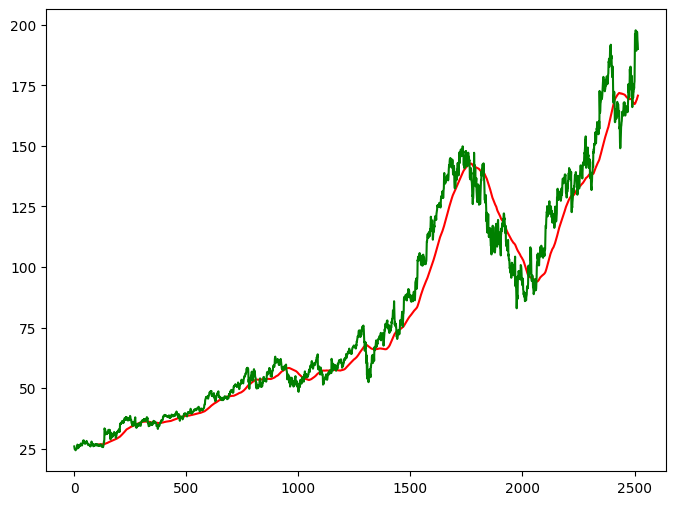

In [4]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [5]:
ma_200_days = data.Close.rolling(200).mean()

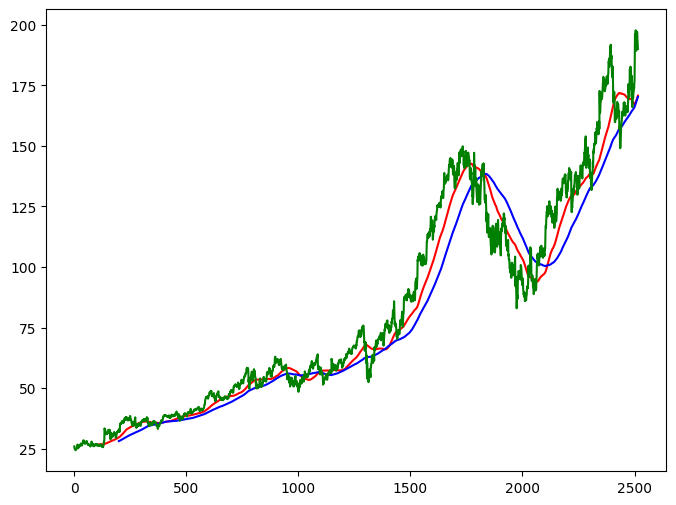

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [7]:
data.dropna(inplace=True)

In [8]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [9]:
data_train.shape[0]

2012

In [10]:
data_test.shape[0]

504

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [14]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [15]:
x,y=np.array(x),np.array(y)

In [16]:
model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - loss: 0.0583
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0078
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0059
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0063
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0048
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0063
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0060
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0046
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0044
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0045
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0043
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0045
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0044
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0037
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0040
Ep

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [20]:
pas_100_days = data_train.tail(100)

In [21]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [22]:
data_test_scale = scaler.fit_transform(data_test)

In [23]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x,y=np.array(x),np.array(y)

In [24]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


In [25]:
scale=1/scaler.scale_

In [26]:
y_predict=y_predict*scale

In [27]:
y=y*scale

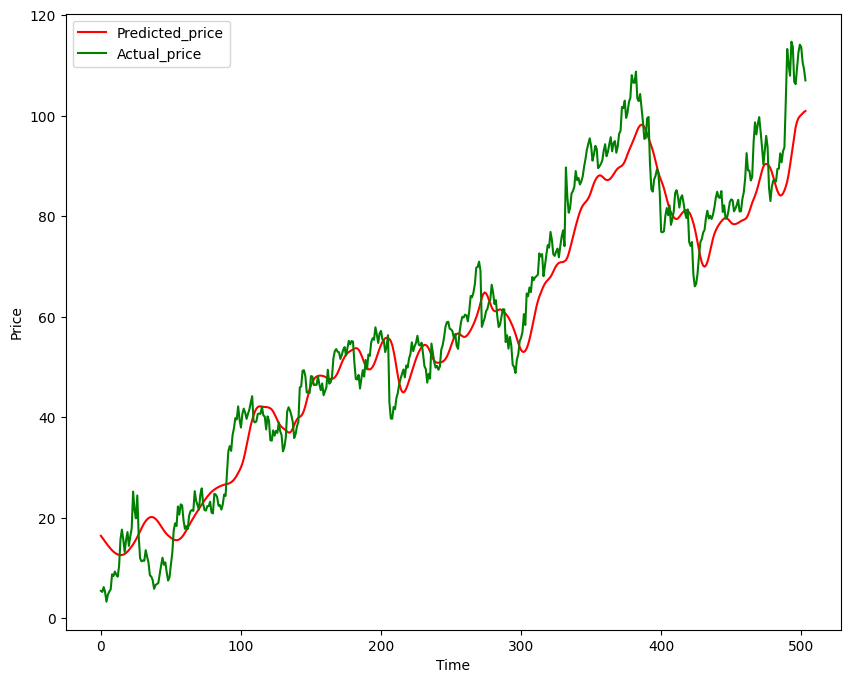

In [28]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted_price')
plt.plot(y,'g',label='Actual_price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('my_stock_prediction_model.keras')